# 10장 데크, 우선순위 큐

### 데크
> 데크 Deque는 더블 엔디드 큐 Double-Ended Queue의 줄임말로, 글자 그대로 양쪽 끝을 모두 추출 할 수 있는 큐를 일반화한 형태의 추상 자료형 (ADT)이다.

데크는 양쪽에서 삭제와 삽입을 모두 처리할 수 있으며, 스택과 큐의 특징을 모두 갖고 있다. 이 추상자료형 (ADT)의 구현은 배열이나 연결리스트 모두 가능하지만, 특별히 다음과 같은 이중 연결 리스트로 구현하는 편이 가장 잘 어울린다.

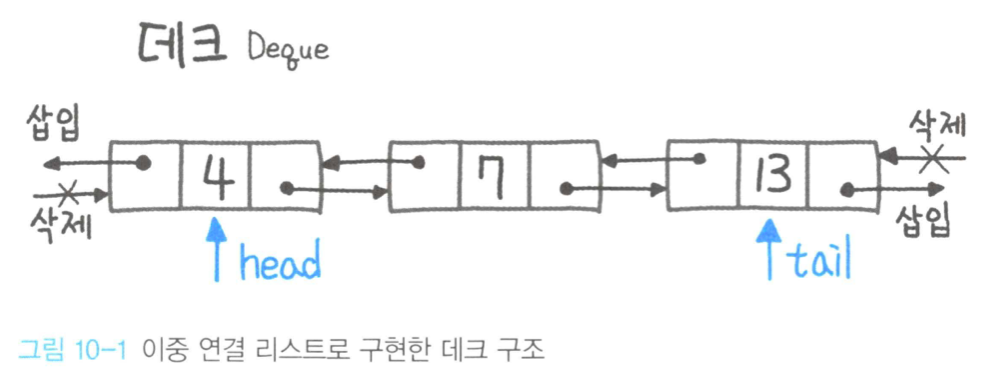

이중 연결 리스트로 구현하게 되면, 위의 그림처럼 양쪽으로 head와 tail이라는 이름의 두 포인터를 깢고 있다가 새로운 아이템이 추가될 때 마다 앞쪽 또는 뒤쪽으로 연결시켜주기만 하면 된다. 당연히 연결 후에는 포인터를 이동하면 된다.

파이썬은 데크 자료형을 다음과 같이 collections 모듈에서 deque라는 이름으로 지원한다.

In [ ]:
import collections

d = collections.deque()
type(d)

이 collections.deque는 위 그림과 마찬가지로 이중 연결 리스트로 구현되어 있습니다.

CPython에서 고정 길이 하위 배열 (Subarray)을 지닌 이중 연결 리스트로 구현되어 있으며, 내부 구현을 살펴보면 마찬가지로 다음과 같은 구조체인 dequeobject가 block는 왼쪽, 오른쪽 인덱스 정보와 최대 길이 등 여러 가지 부가 정보를 함께 보관하고 있는 풍부한 구조체임을 확인할 수 있습니다.

### 26. 원형 데크 디자인

다음 연산을 제공하는 원형 데크를 디자인하라.

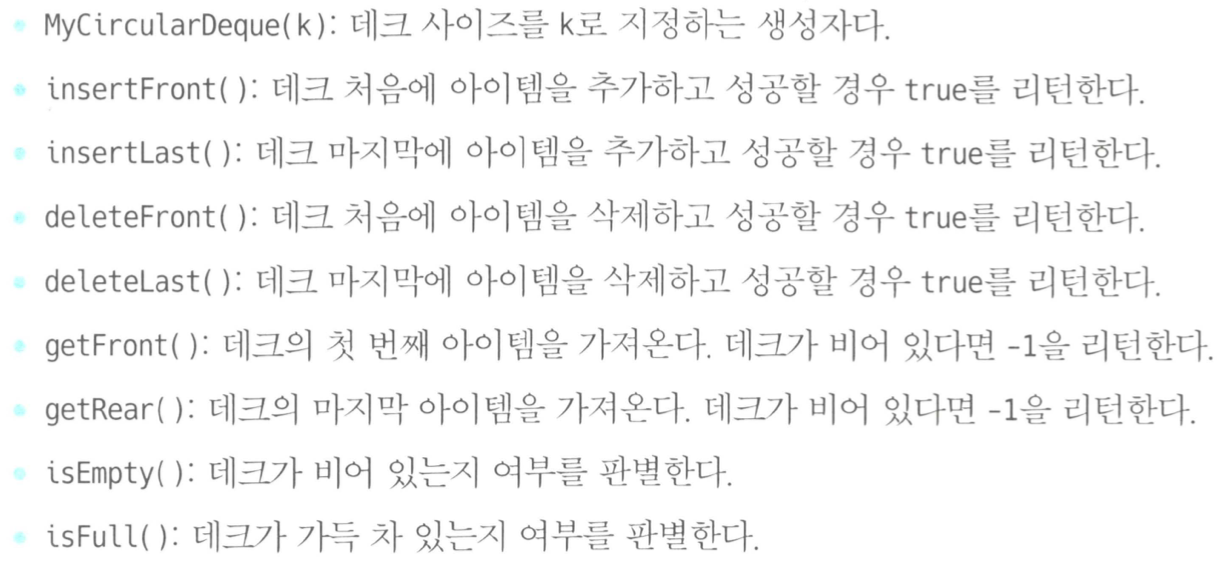

### 풀이 1. 이중 연결리스트를 이용한 데크 구현

데크란 앞서 설명에서 언급했듯이 양쪽 끝을 모두 추출할 수 있는 큐를 말한다.

In [ ]:
# ListNode 정의
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

class MyCircularDeque:
    def __init__(self, k: int):
        self.head, self.tail = ListNode(None), ListNode(None)
        self.k, self.len = k, 0
        self.head.right, self.tail.left = self.tail, self.head

    # 이중 연결 리스트에 신규 노드 삽입
    def _add(self, node: ListNode, new: ListNode):
        n = node.right
        node.right = new
        new.left, new.right = node, n
        n.left = new

    def _del(self, node: ListNode):
        n = node.right.right
        node.right = n
        n.left = node

    def insertFront(self, value: int) -> bool:
        if self.len == self.k:
            return False
        self.len += 1
        self._add(self.head, ListNode(value))
        return True

    def insertLast(self, value: int) -> bool:
        if self.len == self.k:
            return False
        self.len += 1
        self._add(self.tail.left, ListNode(value))
        return True

    def deleteFront(self) -> bool:
        if self.len == 0:
            return False
        self.len -= 1
        self._del(self.head)
        return True

    def deleteLast(self) -> bool:
        if self.len == 0:
            return False
        self.len -= 1
        self._del(self.tail.left.left)
        return True

    def getFront(self) -> int:
        return self.head.right.val if self.len else -1

    def getRear(self) -> int:
        return self.tail.left.val if self.len else -1

    def isEmpty(self) -> bool:
        return self.len == 0

    def isFull(self) -> bool:
        return self.len == self.k

cir = MyCircularDeque(5) # MyCircularDeque 객체 생성
print(cir) # MyCircularDeque object 생성 확인

In [ ]:
cir.isEmpty() # 처음에는 아무것도 들어있지 않으므로 True 출력

In [ ]:
cir.insertFront(1) # 데크 처음에 1을 추가하고 성공할 경우 True 리턴

In [ ]:
cir.insertLast(5) # 데크 마지막에 아이템을 추가하고 성공할 경우 True 리턴

In [ ]:
cir.head

In [ ]:
cir.tail

In [ ]:
cir.k

In [ ]:
cir.len

In [ ]:
cir.head.right

In [ ]:
cir.tail.left

In [ ]:
cir.deleteFront()

In [ ]:
cir.deleteLast()

In [ ]:
cir.getFront()

In [ ]:
cir.getRear()

In [ ]:
cir.insertFront(1)

In [ ]:
cir.insertFront(2)

In [ ]:
cir.insertFront(3)

In [ ]:
cir.insertLast(5)

In [ ]:
cir.insertLast(4)

In [ ]:
cir.isFull()

### 우선순위 큐

> 우선순위 큐는 큐 또는 스택과 같은 추상 자료형과 유사하지만 추가로 각 요소의 '우선순위'와 연관되어 있다.

스택은 가장 나중에 삽입된 요소를 먼저 추출하고, 큐는 가장 먼저 삽입된 요소를 먼저 추출한다. 그러나 이와 달리 우선순위 큐는 어떠한 특정 조건에 따라 우선순위가 가장 높은 요소가 추출되는 자료형이다.

대표적으로 최댓값을 추출하는 우선순위 큐가 있다고 가정하자.

이 경우 항상 남아 있는 요소들의 최댓값이 우선순위에 따라 추출되어 5, 4, 3, 2, 1 순으로 추출됩니다.

### 27. k개 정렬 리스트 병합

k개의 정렬된 리스트를 1개의 정렬된 리스트로 병합하라.

- 입력  
[ 1->4->5, 1->3->4, 2->6]

- 출력  
1 -> 1 -> 2 -> 3 -> 4-> 4 -> 5 -> 6

- 설명  
여기서 k는 3이다.

### 풀이 1. 우선순위 큐를 이용한 리스트 병합

우선순위 큐를 활용해서, 최소값에 해당하는 node.val을 추출하고, next가 존재하면 next.val를 우선순위 큐에 다시 넣어줍니다.

파이썬에서 우선순위 큐는 heapq 모듈을 사용합니다.

In [ ]:
import heapq # 최소 힙 Min Heap을 지원 -> lst.val 이 작은 순서대로 pop() 할 수 있습니다. 
 
class ListNode:
  def __init__(self, x):
    self.val = x
    self.next = None

class Solution:
    def mergeKLists(self, lists) -> ListNode:
        root = result = ListNode(None)
        heap = []

        # 각 연결 리스트의 루트를 힙에 저장
        for i in range(len(lists)):
            if lists[i]:
                heapq.heappush(heap, (lists[i].val, i, lists[i]))
                # heappop()으로 값을 추출하면 가장 작은 노드의 연결 리스트부터 차례대로 나오게 되며,
                # 이 값을 결과가 될 노드 result에 하나씩 추가합니다.
 
        # 힙 추출 이후 다음 노드는 다시 저장
        while heap: 
              node = heapq.heappop(heap)
              idx = node[1]
              result.next = node[2]
              # 힙에서 빼온 node를 result의 다음 노드가 가르킬 수 있게 해줍니다.

              result = result.next
              # 이렇게 힙에 아무 값도 남지 않을 때가지 반복하면
              # result에는 작은 노드부터 차례대로 연결됩니다.             
              if result.next:
                  heapq.heappush(heap, (result.next.val, idx, result.next)) 

        return root.next

In [ ]:
l1 = ListNode(1)
l1.next = ListNode(4)
l1.next.next = ListNode(5)

l2 = ListNode(1)
l2.next = ListNode(3)
l2.next.next = ListNode(4)

l3 = ListNode(2)
l3.next = ListNode(6)

Solution().mergeKLists([l1, l2, l3])

In [ ]:
print(Solution().mergeKLists([l1, l2, l3]))